In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5,
                 shuffle= True,
                 random_state = 0)

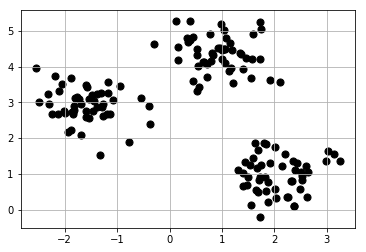

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],
           X[:,1], 
           c='black',
           marker='o',
           s=50)
plt.grid()
plt.show()

K-means algorithm in a nut shell

1. Randomly pick k centroids from the sample points as initial cluster centers
2. Assign each sample to the nearest centroid
3. Move the centroids to the center of the samples that were assigned to it
4. Repeat Steps 2 and 3 until the cluster assignments do not change or a user-defined tolderance or a maximum number of iterations is reached

Measuring similarity- e.g., opposite of distance

Squared Euclidean Distance is the sum of swared differnce between the features of two points. 
K-means can use within-cluster sum of squared errors (cluster inertia)



In [9]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3,
           init = 'random',
           n_init = 10,
           max_iter = 300,
           tol=1e-04,
           random_state= 0)
y_km = km.fit_predict(X)

array([1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 1, 0,
       0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1, 1, 1,
       2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 0,
       1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0, 2, 0, 1, 2, 0,
       2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2,
       1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1], dtype=int32)

Kmeans ++ places centroids far away from each other. For each sample X that is not in M find the minimum squared distance. To randomly select the next centroid use a weighted probability distribution. Repeat until centroids are chosen and proceed with k-means. 

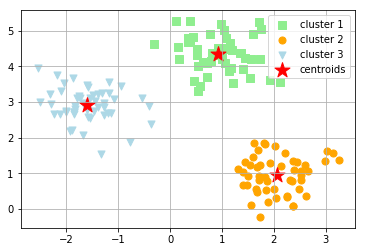

In [11]:
>>> plt.scatter(X[y_km==0,0], 
...             X[y_km ==0,1], 
...             s=50, 
...             c='lightgreen', 
...             marker='s', 
...             label='cluster 1')
>>> plt.scatter(X[y_km ==1,0], 
...             X[y_km ==1,1], 
...             s=50, 
...             c='orange', 
...             marker='o', 
...             label='cluster 2')
>>> plt.scatter(X[y_km ==2,0], 
...             X[y_km ==2,1], 
...             s=50, 
...             c='lightblue', 
...             marker='v', 
...             label='cluster 3')
>>> plt.scatter(km.cluster_centers_[:,0],
...             km.cluster_centers_[:,1], 
...             s=250, 
...             marker='*', 
...             c='red', 
...             label='centroids')
>>> plt.legend()
>>> plt.grid()
>>> plt.show()

Fuzzy Clustering (FCM) is similar to k-means except replace the hard cluster assignment by probabilities for each point belonging to each cluster. 

Objective function is within cluster sum-squared-error except the membership indicator w is not binary but instead a probability. 

Weights have a reasonably complex (but understandable form)

In [12]:
### Evaluate using "distortion" metric
print('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


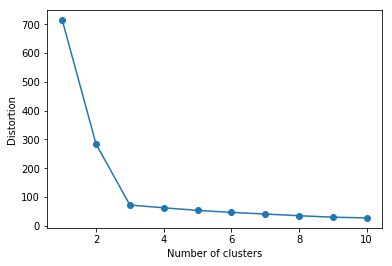

In [17]:
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters = i,
               init = 'k-means++',
               n_init=10,
               max_iter=300,
               random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1,11), distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

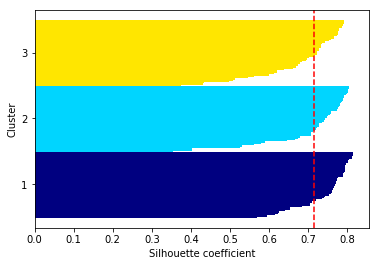

In [18]:
>>> km = KMeans(n_clusters=3, 
...             init='k-means++', 
...             n_init=10, 
...             max_iter=300,
...             tol=1e-04,
...             random_state=0)
>>> y_km = km.fit_predict(X)

>>> import numpy as np
>>> from matplotlib import cm
>>> from sklearn.metrics import silhouette_samples
>>> cluster_labels = np.unique(y_km)
>>> n_clusters = cluster_labels.shape[0]
>>> silhouette_vals = silhouette_samples(X, 
...                                      y_km, 
...                                      metric='euclidean')
>>> y_ax_lower, y_ax_upper = 0, 0
>>> yticks = []
>>> for i, c in enumerate(cluster_labels):
...     c_silhouette_vals = silhouette_vals[y_km == c]
...     c_silhouette_vals.sort()
...     y_ax_upper += len(c_silhouette_vals)
...     color = cm.jet(i / n_clusters)
...     plt.barh(range(y_ax_lower, y_ax_upper), 
...              c_silhouette_vals, 
...              height=1.0, 
...              edgecolor='none', 
...              color=color)
...     yticks.append((y_ax_lower + y_ax_upper) / 2)
...     y_ax_lower += len(c_silhouette_vals)
>>> silhouette_avg = np.mean(silhouette_vals)
>>> plt.axvline(silhouette_avg,
...             color="red", 
...             linestyle="--") 
>>> plt.yticks(yticks, cluster_labels + 1)
>>> plt.ylabel('Cluster')
>>> plt.xlabel('Silhouette coefficient')
>>> plt.show()

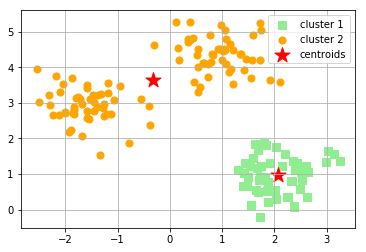

In [19]:
>>> km = KMeans(n_clusters=2, 
...             init='k-means++', 
...             n_init=10, 
...             max_iter=300,
...             tol=1e-04,
...             random_state=0)
>>> y_km = km.fit_predict(X)

>>> plt.scatter(X[y_km==0,0], 
...             X[y_km==0,1], 
...             s=50, c='lightgreen', 
...             marker='s', 
...             label='cluster 1')
>>> plt.scatter(X[y_km==1,0], 
...             X[y_km==1,1], 
...             s=50, 
...             c='orange', 
...             marker='o', 
...             label='cluster 2')
>>> plt.scatter(km.cluster_centers_[:,0], 
...             km.cluster_centers_[:,1], 
...             s=250, 
...             marker='*', 
...             c='red', 
...             label='centroids')
>>> plt.legend()
>>> plt.grid()
>>> plt.show()

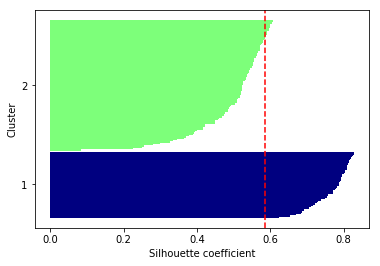

In [20]:
>>> cluster_labels = np.unique(y_km)
>>> n_clusters = cluster_labels.shape[0]
>>> silhouette_vals = silhouette_samples(X, 
...                                      y_km, 
...                                      metric='euclidean')
>>> y_ax_lower, y_ax_upper = 0, 0
yticks = []
>>> for i, c in enumerate(cluster_labels):
...     c_silhouette_vals = silhouette_vals[y_km == c]
...     c_silhouette_vals.sort()
...     y_ax_upper += len(c_silhouette_vals)
...     color = cm.jet(i / n_clusters)
...     plt.barh(range(y_ax_lower, y_ax_upper), 
...              c_silhouette_vals, 
...              height=1.0, 
...              edgecolor='none', 
...              color=color)
...     yticks.append((y_ax_lower + y_ax_upper) / 2)
...     y_ax_lower += len(c_silhouette_vals)
>>> silhouette_avg = np.mean(silhouette_vals)
>>> plt.axvline(silhouette_avg, color="red", linestyle="--") 
>>> plt.yticks(yticks, cluster_labels + 1)
>>> plt.ylabel('Cluster')
>>> plt.xlabel('Silhouette coefficient')
>>> plt.show()

### Organizing Clusters as a Hierarchical tree

Two Main Approaches:

Agglomerative- Two standard algorithms- single linkage and complete linkage  

    *Single Linkage*- Compute distances between the most similar members for each pair of clusters and merge the two clusters where distance is at a minimum 
    *Complete linkage*- instead of comparing the most similar members in the cluster we compare the most dissimilar members to perform the merge.
    Average Linkage - cluster pairs on min average distances between all group members in the two clusters. 
    Ward's method - two clusters that lead to the minimum increase of the total within-cluster SSE are merged

Divisive - start with one cluster and iteratively split the cliusters into smaller clusters until each contains only 1 sample. 

#### Clustering using complete linkage
    1. Compute distance matrix of all samples
    2. Represent each datpoint as a singleton cluster
    3. Merge two closest clusters based on the distance of the most dissimilar (distant) members
    4. Update the similartiy matrix
    5. Repeat steps 2 to 4 until one single cluster remains. 
   

In [23]:
### Computing the distance matrix
### Rows are different observations and columns are different features

import pandas as pd
import numpy as np
np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2','ID_3', 'ID_4']
X = np.random.random_sample([5,3])*10
df = pd.DataFrame(X, columns = variables, index = labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


#### Performing hierarchical clustering on a distance matrix

In [24]:
### calculate distance with pdist function from scipy's spatial.distance module

from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(pdist(df, metric = 'euclidean')), columns = labels, index = labels)

In [25]:
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [26]:
from scipy.cluster.hierarchy import linkage
help(linkage)

/Users/andrew.moskowitz/anaconda2/envs/py36/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1d compressed distance matrix
    or a 2d array of observation vectors.
    
    If y is a 1d compressed distance matrix,
    then y must be a :math:`{n \choose 2}` sized
    vector where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents th

In [28]:
>>> row_clusters = linkage(pdist(df, metric='euclidean'),
...                        method='complete')

In [29]:
pd.DataFrame(row_clusters, columns = ['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
            index = ['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


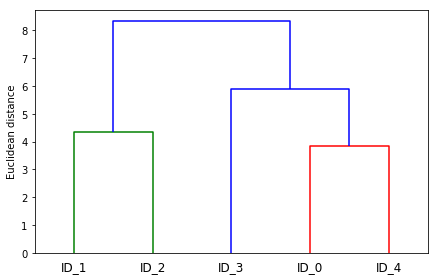

In [30]:
from scipy.cluster.hierarchy import dendrogram
row_dendr = dendrogram(row_clusters, labels = labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

### Attachign dendrograms to a heatmap

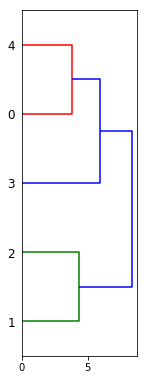

In [32]:
### 1. Create a new figure object that defines the x and y axes. Rotate the dendrogram 90 degrees counterclockwise

fig = plt.figure(figsize=(8,8))
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters, orientation = 'right')

In [33]:
### Reorder initial DF according to clustering labels that can be accessed from the dendrogram object 
df_rowclust = df.ix[row_dendr['leaves'][::-1]]

/Users/andrew.moskowitz/anaconda2/envs/py36/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [35]:
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')

/Users/andrew.moskowitz/anaconda2/envs/py36/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [36]:
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

In [38]:
### Trimming the cluster tree

from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [0 1 1 0 0]
